In [73]:
import os
import pandas as pd


def load_berlin_sept_oct_data():
    csv_path = os.path.join(os.getcwd(), "large_output3.txt")
    return pd.read_csv(csv_path)


berlin_data = load_berlin_sept_oct_data()
berlin_data.head()

,provider,session_id,timestamp,traffic_eta_hsp,traffic_eta_flow,base_eta_static,track_duration,dp_score,total_length,local_day_of_week,...,maneuvers_right_turns,maneuvers_uturns,maneuvers_junctions,maneuvers_roundabouts,maneuvers_left_turn_angle_sum,maneuvers_right_turn_angles_sum,total_turn_time,speed_km_h,static_speed_km_h,mean_speed_limit
0,BLITZER,2018-09-09T01:52:37+0200#7a3ae4424ce0a72eaf460...,2018-09-09 00:00:00,1016.0,1037.0,1015.0,966.0,90.974909,8021.0,6.0,...,3.0,2.0,6.0,0.0,-4.538214,3.322941,318.0,47.836679,47.836679,15.298383
1,BLITZER,2018-09-09T01:26:10+0200#d09f48c34cb43e7e3edcf...,2018-09-09 00:00:00,996.0,1133.0,996.0,1172.0,99.111337,7892.0,6.0,...,3.0,0.0,7.0,0.0,-5.293834,4.367389,188.0,37.293588,37.293588,13.839613
2,BLITZER,2018-09-08T15:00:02+0200#c1625b743761fa0a448e1...,2018-09-09 00:00:00,1370.0,1518.0,1369.0,1595.0,98.785425,11136.0,6.0,...,5.0,0.0,8.0,1.0,-4.719984,7.390694,288.0,39.549210,39.549210,13.322158
3,BLITZER,2018-09-09T01:47:59+0200#5a589a4094102384bbe5e...,2018-09-09 00:00:01,1114.0,1176.0,1113.0,1085.0,99.613832,11420.0,6.0,...,3.0,0.0,7.0,1.0,-9.685997,2.936063,165.0,45.080035,45.080035,13.751703
4,BLITZER,2018-09-08T16:20:23+0200#76af5bcd16e4de8978a98...,2018-09-09 00:00:01,2382.0,2495.0,2380.0,1944.0,98.287849,19313.0,6.0,...,8.0,1.0,17.0,0.0,-6.726122,11.389041,533.0,41.065189,41.065189,13.196494


In [74]:
#berlin_data["track_duration"].value_counts()
#berlin_data.describe()
berlin_data.describe()

,traffic_eta_hsp,traffic_eta_flow,base_eta_static,track_duration,dp_score,total_length,local_day_of_week,local_time_of_day,local_month,is_local_holiday,...,maneuvers_right_turns,maneuvers_uturns,maneuvers_junctions,maneuvers_roundabouts,maneuvers_left_turn_angle_sum,maneuvers_right_turn_angles_sum,total_turn_time,speed_km_h,static_speed_km_h,mean_speed_limit
count,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,0.0,...,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000
mean,1531.094115,1693.843910,1411.093597,1713.155631,89.513408,15008.451883,2.229394,46807.348998,9.506494,NaN,...,4.447019,0.168591,7.941922,0.313987,-5.206150,5.696887,248.345375,50.608382,50.608382,15.575281
std,582.217512,645.386122,542.953728,662.096829,15.401175,6758.482926,1.926656,16118.319735,0.499960,NaN,...,2.822083,0.477704,5.017150,0.640206,3.747539,4.124786,119.288043,11.884162,11.884162,3.117016
min,239.000000,241.000000,239.000000,901.000000,0.067333,1946.000000,0.000000,5.000000,9.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,-50.041347,-1.742648,6.000000,18.384592,18.384592,6.106695
25%,1097.000000,1205.000000,1013.000000,1202.000000,88.850738,9987.000000,1.000000,33057.000000,9.000000,NaN,...,2.000000,0.000000,4.000000,0.000000,-7.257329,2.839210,165.000000,42.194871,42.194871,13.485304
50%,1415.000000,1558.000000,1306.000000,1557.000000,95.962884,13836.000000,2.000000,48037.000000,10.000000,NaN,...,4.000000,0.000000,7.000000,0.000000,-4.610096,4.916878,228.000000,46.727794,46.727794,14.353064
75%,1861.000000,2059.000000,1714.000000,2074.000000,98.678390,18770.000000,4.000000,59005.000000,10.000000,NaN,...,6.000000,0.000000,11.000000,0.000000,-2.621439,7.829186,311.000000,56.998332,56.998332,17.102429
max,5161.000000,5468.000000,5155.000000,4499.000000,100.000000,60433.000000,6.000000,86398.000000,10.000000,NaN,...,42.000000,14.000000,59.000000,7.000000,3.011196,66.333381,2229.000000,97.774155,97.774155,41.970362


In [75]:
#Figure out which prediction is best between HSP / ETA Flow and Base ETA Static
actual_vs_historic = berlin_data["track_duration"] - berlin_data["traffic_eta_hsp"]
print("HSP based prediction Average Error:", actual_vs_historic.abs().mean())
print("HSP based prediction Error StdDev:", actual_vs_historic.abs().std())

actual_vs_traffic = berlin_data["track_duration"] - berlin_data["traffic_eta_flow"]
print("Traffic based prediction Average Error:", actual_vs_traffic.abs().mean())
print("Traffic based prediction Error StdDev:", actual_vs_traffic.abs().std())

actual_vs_static = berlin_data["track_duration"] - berlin_data["base_eta_static"]
print("Static speed based prediction Average Error:", actual_vs_static.abs().mean())
print("Static speed based prediction Error StdDev:", actual_vs_static.abs().std())

#Count how often each prediction is best
temp1 = berlin_data[['track_duration', 'traffic_eta_flow', 'traffic_eta_hsp', 'base_eta_static']].copy()
temp1["eta_flow_error"] = temp1["track_duration"] - temp1["traffic_eta_flow"]
temp1["hsp_flow_error"] = temp1["track_duration"] - temp1["traffic_eta_hsp"]
temp1["base_flow_error"] = temp1["track_duration"] - temp1["base_eta_static"]

temp1["abs_eta_flow_error"] = temp1["eta_flow_error"].abs()
temp1["abs_hsp_flow_error"] = temp1["hsp_flow_error"].abs()
temp1["abs_base_flow_error"] = temp1["base_flow_error"].abs()

temp2 = temp1[['abs_eta_flow_error', 'abs_hsp_flow_error', 'abs_base_flow_error']].copy()
temp2['lowest_err'] = temp2.idxmin(axis=1) #Get column with lowest value (lowest error)
temp2['lowest_err'].value_counts()

HSP based prediction Average Error: 256.483173170827
HSP based prediction Error StdDev: 268.4017465911794
Traffic based prediction Average Error: 202.50237313957575
Traffic based prediction Error StdDev: 193.89951639032634
Static speed based prediction Average Error: 338.3994882612602
Static speed based prediction Error StdDev: 326.4180712663029


abs_eta_flow_error     59578
abs_base_flow_error    22051
abs_hsp_flow_error     20767
Name: lowest_err, dtype: int64

Min: Average Error: 147.49874018516348
Min: Error StdDev: 187.69837584620265


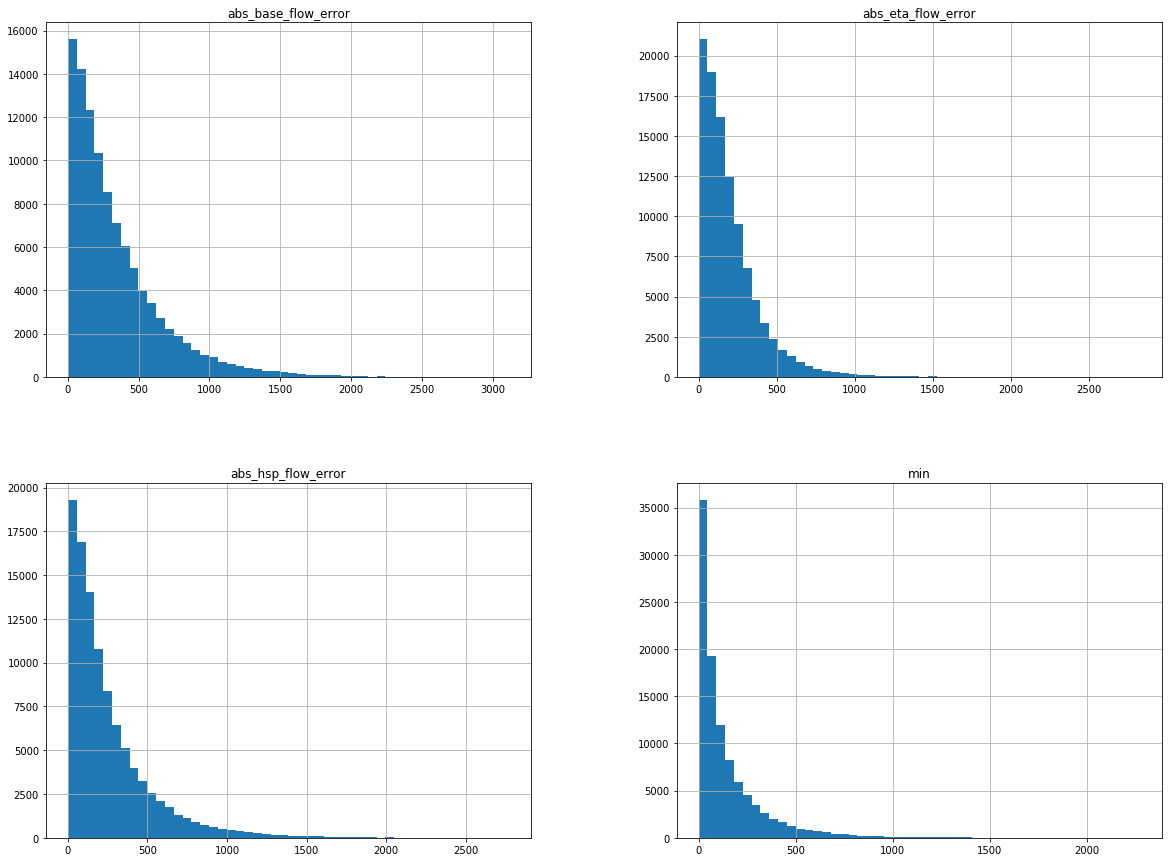

In [76]:
#If we can somehow pick the best prediction each time how good can it be
temp3 = temp1[['abs_eta_flow_error', 'abs_hsp_flow_error', 'abs_base_flow_error']].copy()
#Find minimum value
temp3['min'] = temp3.loc[:, ['abs_eta_flow_error', 'abs_hsp_flow_error', 'abs_base_flow_error']].min(axis=1)
print("Min: Average Error:", temp3['min'].mean())
print("Min: Error StdDev:", temp3['min'].std())

%matplotlib inline
import matplotlib.pyplot as plt
temp3.hist(bins=50, figsize=(20,15))
plt.show()

In [77]:
#One Hot Encoding
# Taken from http://www.insightsbot.com/blog/McTKK/python-one-hot-encoding-with-scikit-learn

#OHE of Day of Week
from sklearn.preprocessing import OneHotEncoder
dayofweek_ohe = OneHotEncoder()
X = dayofweek_ohe.fit_transform(berlin_data.local_day_of_week.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["LocalDayOfWeek_"+str(int(i)) for i in range(X.shape[1])])
berlin_data = pd.concat([berlin_data, dfOneHot], axis=1)

#Drop One Hot Encoded Fields
berlin_data.drop(columns=["local_day_of_week"], axis=1, inplace=True)
berlin_data.drop(columns=["day_of_week_sin"], axis=1, inplace=True)
berlin_data.drop(columns=["day_of_week_cos"], axis=1, inplace=True)

/Users/fkelly/Library/Python/3.7/lib/python/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [78]:
#OHE of Time of day into 48 separate 30 minute blocks
timeOfDay = OneHotEncoder()
#berlin_data.loc[:,'local_time_of_day'] /= 30*60 #Divide minutes into 30 minute blocks (48 of them) 
berlin_data['local_time_of_day'] = berlin_data['local_time_of_day'].div(30*60).round(0)
Xt = timeOfDay.fit_transform(berlin_data.local_time_of_day.values.reshape(-1,1)).toarray()
dfOneHotTime = pd.DataFrame(Xt, columns = ["LocalTimeOfDay_"+str(int(i)) for i in range(Xt.shape[1])])
berlin_data = pd.concat([berlin_data, dfOneHotTime], axis=1)

#Drop One Hot Encoded Fields
berlin_data.drop(columns=["local_time_of_day"], axis=1, inplace=True)
berlin_data.drop(columns=["time_of_day_sin"], axis=1, inplace=True)
berlin_data.drop(columns=["time_of_day_cos"], axis=1, inplace=True)

berlin_data.describe()

/Users/fkelly/Library/Python/3.7/lib/python/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,traffic_eta_hsp,traffic_eta_flow,base_eta_static,track_duration,dp_score,total_length,local_month,is_local_holiday,start_lat,start_lon,...,LocalTimeOfDay_39,LocalTimeOfDay_40,LocalTimeOfDay_41,LocalTimeOfDay_42,LocalTimeOfDay_43,LocalTimeOfDay_44,LocalTimeOfDay_45,LocalTimeOfDay_46,LocalTimeOfDay_47,LocalTimeOfDay_48
count,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,0.0,102396.000000,102396.000000,...,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000,102396.000000
mean,1531.094115,1693.843910,1411.093597,1713.155631,89.513408,15008.451883,9.506494,NaN,52.503484,13.397561,...,0.015049,0.012442,0.009649,0.008379,0.006895,0.005752,0.005166,0.003994,0.003193,0.001338
std,582.217512,645.386122,542.953728,662.096829,15.401175,6758.482926,0.499960,NaN,0.059266,0.124600,...,0.121750,0.110848,0.097754,0.091154,0.082749,0.075625,0.071691,0.063074,0.056421,0.036554
min,239.000000,241.000000,239.000000,901.000000,0.067333,1946.000000,9.000000,NaN,52.342425,13.090210,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1097.000000,1205.000000,1013.000000,1202.000000,88.850738,9987.000000,9.000000,NaN,52.460734,13.315398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1415.000000,1558.000000,1306.000000,1557.000000,95.962884,13836.000000,10.000000,NaN,52.509963,13.400360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1861.000000,2059.000000,1714.000000,2074.000000,98.678390,18770.000000,10.000000,NaN,52.541432,13.496023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5161.000000,5468.000000,5155.000000,4499.000000,100.000000,60433.000000,10.000000,NaN,52.659953,13.756909,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


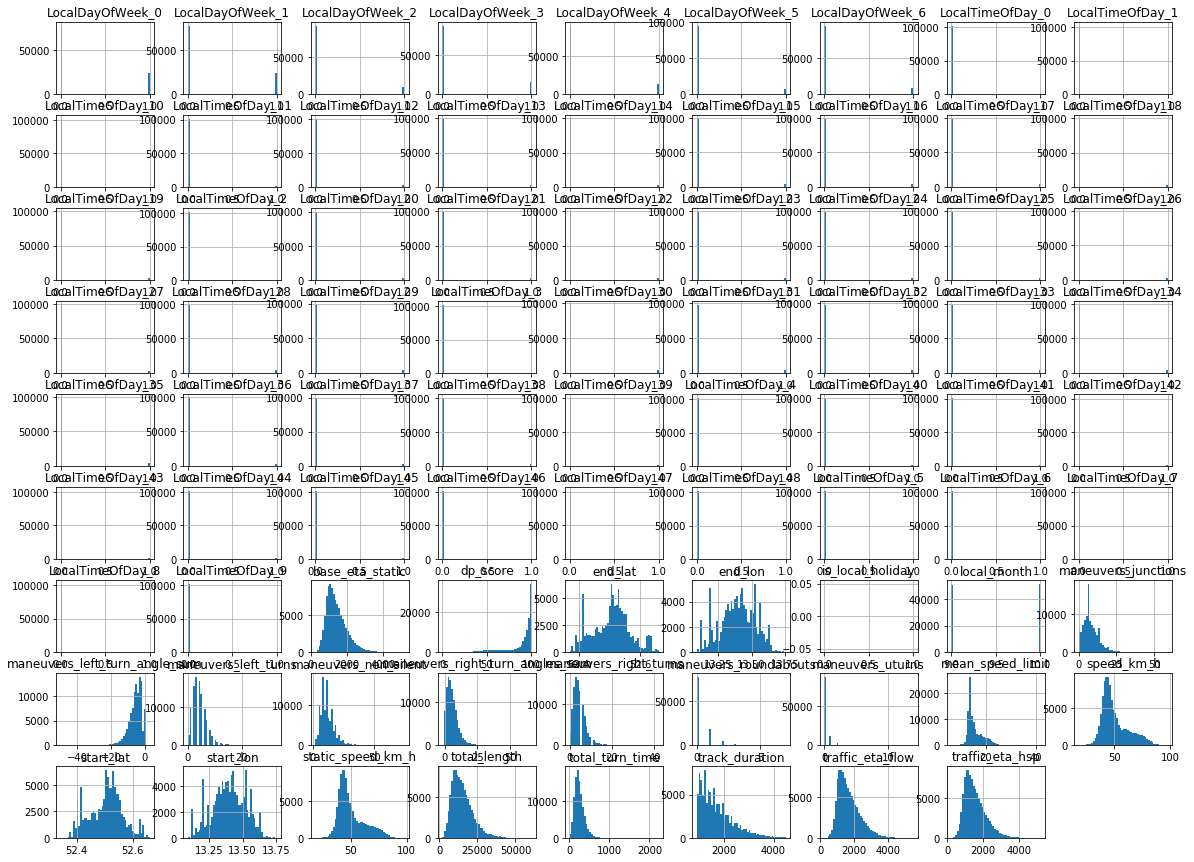

In [79]:
berlin_data.hist(bins=50, figsize=(20,15))
plt.show()

In [80]:
#Data Cleaning - Remove non-floats
berlin_data.drop(columns=["provider"], axis=1, inplace=True)
berlin_data.drop(columns=["session_id"], axis=1, inplace=True)
berlin_data.drop(columns=["timestamp"], axis=1, inplace=True)
berlin_data.drop(columns=["is_local_holiday"], axis=1, inplace=True)

#Remove prior predictions
#berlin_data.drop(columns=["traffic_eta_hsp"], axis=1, inplace=True)
#berlin_data.drop(columns=["traffic_eta_flow"], axis=1, inplace=True)
#berlin_data.drop(columns=["base_eta_static"], axis=1, inplace=True)

#Remove rows where dp_score is below threshold
print("Len Before: ", len(berlin_data))
berlin_data = berlin_data.drop(berlin_data[berlin_data.dp_score < 80].index)
print("Len After: ", len(berlin_data))

#Remove probably useless variables
#berlin_data.drop(columns=["local_month"], axis=1, inplace=True)
berlin_data.drop(columns=["start_lat"], axis=1, inplace=True)
berlin_data.drop(columns=["start_lon"], axis=1, inplace=True)
berlin_data.drop(columns=["end_lat"], axis=1, inplace=True)
berlin_data.drop(columns=["end_lon"], axis=1, inplace=True)

corr_matrix = berlin_data.corr()
corr_matrix["track_duration"].sort_values(ascending=False)

Len Before:  102396
Len After:  85644


track_duration                     1.000000
traffic_eta_flow                   0.916917
traffic_eta_hsp                    0.878677
base_eta_static                    0.844112
total_length                       0.737097
total_turn_time                    0.653327
maneuvers_non_silent               0.534737
maneuvers_left_turns               0.468012
maneuvers_junctions                0.446483
maneuvers_right_turns              0.441595
maneuvers_right_turn_angles_sum    0.390972
maneuvers_roundabouts              0.225215
maneuvers_uturns                   0.094961
LocalDayOfWeek_1                   0.045752
LocalTimeOfDay_16                  0.042565
speed_km_h                         0.041864
static_speed_km_h                  0.041864
LocalDayOfWeek_0                   0.036585
mean_speed_limit                   0.030538
LocalTimeOfDay_14                  0.029447
LocalTimeOfDay_32                  0.029095
LocalTimeOfDay_30                  0.029087
LocalTimeOfDay_31               

In [81]:
#Create the Test Set, Training Set split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(berlin_data, test_size=0.2, random_state=37)

print("Training Set Size ", len(train_set))
print("Test Set Size ", len(test_set))

Training Set Size  68515
Test Set Size  17129


In [84]:
# Data Cleaning - drop the "ground truth" actual duration
berlin_labels = train_set["track_duration"].copy()

train_set.drop(columns=["track_duration"], axis=1, inplace=True)
train_set.head()

#Use Standard scaling: Centering around and scaling happen independently on each feature
# Scaling to unit variance

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#We only want to scale certain features - definitely not the One-hot encoded ones
ct = ColumnTransformer([
        ('somename', StandardScaler(), ['traffic_eta_hsp', 'traffic_eta_flow', 'base_eta_static',
                                        'dp_score', 'total_length',
                                        'maneuvers_non_silent','maneuvers_left_turns','maneuvers_right_turns', 
                                        'maneuvers_uturns', 'maneuvers_junctions', 'maneuvers_roundabouts',
                                        'maneuvers_left_turn_angle_sum', 'maneuvers_right_turn_angles_sum',
                                        'total_turn_time', 'speed_km_h', 'static_speed_km_h', 'mean_speed_limit'])
    ], remainder='passthrough')

berlin_data_scaled = ct.fit_transform(train_set)

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
#
#berlin_data_scaled = scaler.fit_transform(train_set)

#Add back columns
berlin_data_scaled_df = pd.DataFrame(berlin_data_scaled, columns = train_set.columns)
pd.set_option('display.expand_frame_repr', False)
berlin_data_scaled_df.head()

/usr/local/lib/python3.7/site-packages/pandas-0.23.4-py3.7-macosx-10.13-x86_64.egg/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,traffic_eta_hsp,traffic_eta_flow,base_eta_static,dp_score,total_length,local_month,maneuvers_non_silent,maneuvers_left_turns,maneuvers_right_turns,maneuvers_uturns,...,LocalTimeOfDay_39,LocalTimeOfDay_40,LocalTimeOfDay_41,LocalTimeOfDay_42,LocalTimeOfDay_43,LocalTimeOfDay_44,LocalTimeOfDay_45,LocalTimeOfDay_46,LocalTimeOfDay_47,LocalTimeOfDay_48
0,-0.622239,0.496711,-0.539817,-0.896216,0.242133,-0.312509,-0.455498,-0.132944,-0.336874,-0.580055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.250644,1.067177,1.417218,-0.535768,1.063886,1.045994,0.753226,1.338801,-0.336874,1.063860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.152271,-0.360564,-0.094100,-2.356551,-0.189713,1.045994,0.753226,0.970865,-0.336874,0.447392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.808386,3.848593,3.804988,0.827327,2.780633,0.657850,1.156134,-0.132944,-0.336874,0.858371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.478977,-0.436206,-0.483634,0.641221,0.334824,0.463778,1.156134,-0.868816,4.154447,-0.374566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(berlin_data_scaled_df, berlin_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

berlin_predictions = lin_reg.predict(berlin_data_scaled_df)
lin_error = mean_absolute_error(berlin_labels, berlin_predictions)
print("Linear Regression MAE on Test Set: ", lin_error)

from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())    

lin_scores = cross_val_score(lin_reg, berlin_data_scaled_df, berlin_labels, scoring='neg_mean_absolute_error', cv=10)
display_scores(lin_scores)

Linear Regression MAE on Test Set:  174.16348468188372
Scores:  [-173.23381791 -177.93668964 -171.57817525 -172.52377567 -175.01612002
 -177.26388426 -174.44201495 -173.05131616 -176.22070148 -172.21573476]
Mean:  -174.34822301059802
Standard Deviation:  2.0931406361528047


In [87]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(berlin_data_scaled_df, berlin_labels)

berlin_predictions = tree_reg.predict(berlin_data_scaled_df)
tree_mae = mean_absolute_error(berlin_labels, berlin_predictions)
print("Tree Regression MAE on Test Set: ", tree_mae)
tree_scores = cross_val_score(tree_reg, berlin_data_scaled_df, berlin_labels, scoring='neg_mean_absolute_error', cv=10)
display_scores(tree_scores)

Tree Regression MAE on Test Set:  0.0
Scores:  [-237.83041448 -238.51503211 -234.57355517 -235.54495038 -235.14492119
 -236.402423   -235.92614217 -239.82294556 -237.2987885  -234.10217486]
Mean:  -236.51613474130312
Standard Deviation:  1.733658891416935


In [88]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(berlin_data_scaled_df, berlin_labels)

berlin_predictions = forest_reg.predict(berlin_data_scaled_df)
forest_mae = mean_absolute_error(berlin_labels, berlin_predictions)
print("Random Forest Regression MAE on Test Set: ", forest_mae)

forest_scores = cross_val_score(forest_reg, berlin_data_scaled_df, berlin_labels, scoring='neg_mean_absolute_error', cv=10)
display_scores(forest_scores)

/Users/fkelly/Library/Python/3.7/lib/python/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression MAE on Test Set:  69.29413996934979
Scores:  [-175.64049912 -178.39500876 -172.99122884 -175.59722709 -177.33753649
 -176.58121442 -176.95875055 -174.62012845 -178.4491899  -172.6288717 ]
Mean:  -175.9199655305752
Standard Deviation:  1.932078723626975


In [89]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# param_dist = {
# 'n_estimators': [50, 100],
# 'learning_rate' : [0.01,0.05,0.1,0.3],
# 'loss' : ['linear', 'square', 'exponential']
# }
#
# pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
# param_distributions = param_dist,
# cv=3,
# n_iter = 10,
# n_jobs=-1)
#
# pre_gs_inst.fit(berlin_data_scaled_df, berlin_labels)
# pre_gs_inst.best_params_

abr_regressor = AdaBoostRegressor(learning_rate=0.1, n_estimators=50, loss='exponential')
abr_regressor.fit(berlin_data_scaled_df, berlin_labels)

berlin_predictions = abr_regressor.predict(berlin_data_scaled_df)
abr_mae = mean_absolute_error(berlin_labels, berlin_predictions)
print("Adaboost Regression MAE on Test Set: ", abr_mae)

abr_scores = cross_val_score(abr_regressor, berlin_data_scaled_df, berlin_labels, scoring='neg_mean_absolute_error', cv=10)
display_scores(abr_scores)

Adaboost Regression MAE on Test Set:  196.78476754599637
Scores:  [-195.44546986 -200.85788632 -195.63564529 -195.31134207 -194.78495582
 -199.43067137 -199.38638675 -193.6380557  -199.83552865 -193.41366818]
Mean:  -196.77396100116647
Standard Deviation:  2.6498308957066525


In [90]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt_reg = GradientBoostingRegressor(max_depth=5, n_estimators=120, learning_rate=1.0)
gbrt_reg.fit(berlin_data_scaled_df, berlin_labels)

berlin_predictions = gbrt_reg.predict(berlin_data_scaled_df)
gbrt_mae = mean_absolute_error(berlin_labels, berlin_predictions)
print("Gradient Boosted Regression MAE on Test Set: ", gbrt_mae)

gbrt_scores = cross_val_score(gbrt_reg, berlin_data_scaled_df, berlin_labels, scoring='neg_mean_absolute_error', cv=10)
display_scores(gbrt_scores)


Gradient Boosted Regression MAE on Test Set:  135.61539671408073
Scores:  [-180.25091856 -186.64776722 -180.83679138 -183.03884026 -180.61320415
 -183.9940974  -182.78695123 -182.22796888 -186.85697453 -183.2384993 ]
Mean:  -183.049201291626
Standard Deviation:  2.185863838875158


In [91]:
score_list = []
score_list.append(("Adaboost Regression", abr_scores.mean()))
score_list.append(("Linear Regression", lin_scores.mean()))
score_list.append(("Tree Regression", tree_scores.mean()))
score_list.append(("Random Forest Regression", forest_scores.mean()))
score_list.append(("Gradient Boosted Trees Regression", forest_scores.mean()))

from operator import itemgetter
score_list.sort(key=itemgetter(1))

print(score_list)

[('Tree Regression', -236.51613474130312), ('Adaboost Regression', -196.77396100116647), ('Random Forest Regression', -175.9199655305752), ('Gradient Boosted Trees Regression', -175.9199655305752), ('Linear Regression', -174.34822301059802)]


In [29]:
# TODO

# 1) Show DT "feature_importances_"
# 2) Plot learning curves
# 3) Add regularization to linear model
# 4) Use SVM regression
# 5) Extra Trees

# 3) Add other data - the vectors?
# 4) How to use lat / lon ?

# Idea - are there times that one prediction Traffic vs. HSP vs. Static is better than the other?
# If so train a classifer to choose OR "aggregate" the predictions

#Idea - cluster road segment links by some unsupervised "classification"?